# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [19]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv(r"C:\Users\sqroo\Desktop\LaunchCode\call-center-cleanup-assignment\NorthCallCenter.csv")

south_df = pd.read_csv(r"C:\Users\sqroo\Desktop\LaunchCode\call-center-cleanup-assignment\SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [20]:
# EDA Question 1A solution below:
# north_df.info()

north_reps = north_df.value_counts('Rep ID').unique
print(north_reps)

total_north_reps = north_df['Rep ID'].nunique()
print('Total Num. of North Reps:', total_north_reps)

<bound method Series.unique of Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: count, dtype: int64>
Total Num. of North Reps: 9


Total Num. of North Reps: 9

#### EDA Question 1B:  How many reps are in the South branch?  

In [21]:
# EDA Question 1B solution Below:
# south_df.info()

south_reps = south_df.value_counts('Rep ID').unique
print(south_reps)

total_south_reps = south_df['Rep ID'].nunique()
print('Total Num. of South Reps:', total_south_reps)

<bound method Series.unique of Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64>
Total Num. of South Reps: 11


Total Num. of South Reps: 11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [22]:
# EDA Question 2A solution Below:
# north_df.info()
# Busy Minutes
# Not Ready Minutes
# Incoming Wait Time
# During Call Wait Time

north_busy_minutes = round(north_df['Busy Minutes'].mean(), 2)
north_not_ready_minutes = round(north_df['Not Ready Minutes'].mean(), 2)
north_incoming_wait_time = round(north_df['Incoming Wait Time'].mean(), 2)
north_during_call_wait_time = round(north_df['During Call Wait Time'].mean(), 2)

print('North Branch Average Busy Minutes', north_busy_minutes)
print('North Branch Average Not Ready Minutes', north_not_ready_minutes)
print('North Branch Average Incoming Wait Time', north_incoming_wait_time)
print('North Branch Average During Call Wait Time', north_during_call_wait_time)




North Branch Average Busy Minutes 9.99
North Branch Average Not Ready Minutes 1.91
North Branch Average Incoming Wait Time 3.05
North Branch Average During Call Wait Time 2.97


North Branch Average Busy Minutes 9.99
North Branch Average Not Ready Minutes 1.91
North Branch Average Incoming Wait Time 3.05
North Branch Average During Call Wait Time 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [23]:
# EDA Question 2B solution Below:
# south_df.info()
# Busy Minutes
# Not Ready Minutes
# Incoming Wait Time
# During Call Wait Time

south_busy_minutes = round(south_df['Busy Minutes'].mean(), 2)
south_not_ready_minutes = round(south_df['Not Ready Minutes'].mean(), 2)
south_incoming_wait_time = round(south_df['Incoming Wait Time'].mean(), 2)
south_during_call_wait_time = round(south_df['During Call Wait Time'].mean(), 2)

print('South Branch Average Busy Minutes', south_busy_minutes)
print('South Branch Average Not Ready Minutes', south_not_ready_minutes)
print('South Branch Average Incoming Wait Time', south_incoming_wait_time)
print('South Branch Average During Call Wait Time', south_during_call_wait_time)


South Branch Average Busy Minutes 10.05
South Branch Average Not Ready Minutes 1.91
South Branch Average Incoming Wait Time 3.0
South Branch Average During Call Wait Time 3.08


South Branch Average Busy Minutes 10.05
South Branch Average Not Ready Minutes 1.91
South Branch Average Incoming Wait Time 3.0
South Branch Average During Call Wait Time 3.08

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [24]:
# EDA Question 3 solution Below:
north_time_block = north_df.value_counts('Time Block').sort_index()
# print(north_time_block)

south_time_block = south_df.value_counts('Time Block').sort_index()
# print(south_time_block)

total_time_block = north_time_block.add(south_time_block).sort_index()
print(total_time_block)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: count, dtype: int64


Time Block
9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43

Name: count, dtype: int64


##### Record your answers for the EDA section below:
- 1a. Reps in the North Branch = 9
- 1b. Reps in the South Branch = 11

2a. North Branch, (round to the nearest hundredth):
* Busy Minutes = 9.99
* Not Ready Minutes = 1.91
* Incoming Wait Time = 3.05
* During Call Wait Time = 2.97

2b. South Branch, (round to the nearest hundredth):
* Busy Minutes = 10.05
* Not Ready Minutes = 1.91
* Incoming Wait Time = 3.00
* During Call Wait Time = 3.08 

- 3) Total Calls taken for all branches per time block:
* 9:00AM = 10
* 10:00AM = 99 
* 11:00AM = 56
* 12:00PM = 120
* 1:00PM = 40
* 2:00PM = 65
* 3:00PM = 73
* 4:00PM = 53
* 5:00PM = 43 




## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [25]:
# Question 1 solution below
# north_df.info()
# north_df.describe()
# north_df.drop('Incoming Wait Time')

south_df.info()
# south_df.describe()
# south_df.drop('Incoming Wait Time')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

#### Record your answer below:

> Your Answer: There is no missing data that i can tell.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [26]:
# Cleaning Question 2 solution below:
# north_df.describe()
# north_df.info()

yes_sale = north_df['Sale'].unique()
# print("Unclean 'Sale' Column:", yes_sale)

north_df['Sale'] = north_df['Sale'].str.rstrip()
cleaned_yes_sale = north_df['Sale'].unique()
# print("Cleaned 'Sale' Column:", cleaned_yes_sale)

# dirty_incoming = south_df['Incoming or Outgoing'].unique()
# print("Unclean Column:", dirty_incoming)

# south_df['Sale'] = south_df['Sale'].str.rstrip()
# cleaned_incoming = south_df['Sale'].unique()
# print("Cleaned Column:", cleaned_incoming)



##### Record your answer by below:
> Your Answer: While cleaning my data I removed the spaces for the Sale column.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [27]:
# Cleaning Question 3 solution below:
# north_df.duplicated()
# duplicates_north = north_df.duplicated()
# total_duplicates_north = duplicates_north.sum()
# print(total_duplicates_north)

# south_df.duplicated()
# duplicates_south = south_df.duplicated()
# total_duplicates_south = duplicates_south.sum()
# print(total_duplicates_south)


##### Record your answer below:
> Your Answer: There are no duplicates in either the North nor South data sets

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [28]:
# Cleaning Question 4 solution below:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

##### Record your answer below:
> Your Answer: For each individual set the branch column isnt neccessary.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [29]:
# # Create dataframe for the entire company named df
# # using an outer join and confirming the merge
combined_df = pd.merge(north_df, south_df, how='outer')
combined_df.info()
# combined_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [30]:
# Manipulation Question solution below:

north_calls = north_df.groupby('Rep ID', as_index=False)['Calls'].sum()
north_calls_sorted = north_calls.sort_values(by='Calls', ascending=False)
print('North Branch Calls:', north_calls_sorted)

south_calls = south_df.groupby('Rep ID', as_index=False)['Calls'].sum()
south_calls_sorted = south_calls.sort_values(by='Calls', ascending=False)
print('South Branch Calls:', south_calls_sorted)


North Branch Calls:    Rep ID  Calls
2   Brent     37
6   Lilly     30
7    Todd     29
4    Duke     29
5     Joe     26
8  Xander     24
3     Cam     24
0  Amanda     23
1    Andy     23
South Branch Calls:     Rep ID  Calls
1     Eric     35
7    Randy     33
8    Sandy     32
3    Helga     31
2   George     29
6     Kate     29
5     Karl     28
10   Susan     26
4     Josh     26
9   Sharon     25
0    Alice     20


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has 37 calls
- South Branch = Eric has 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [31]:
# Manipulation Question 2 solution below:

north_total_calls = north_df['Calls'].sum()
north_abandoned_calls = north_df['Abandoned'].sum()
north_abandonment_rate = round(north_abandoned_calls / north_total_calls, 4) *100
print('North Branch Average Abandonment Rate:', north_abandonment_rate,'%')

south_total_calls = south_df['Calls'].sum()
south_abandoned_calls = south_df['Abandoned'].sum()
south_abandonment_rate = round(south_abandoned_calls / south_total_calls, 4) *100
print('South Branch Average Abandonment Rate:', south_abandonment_rate,'%')

total_calls = combined_df['Calls'].sum()
total_abandoned_calls = combined_df['Abandoned'].sum()
total_abandonment_rate = round(total_abandoned_calls / total_calls, 4) *100
print('Total Company Average Abandonment Rate:', total_abandonment_rate,'%')


North Branch Average Abandonment Rate: 2.86 %
South Branch Average Abandonment Rate: 1.27 %
Total Company Average Abandonment Rate: 1.97 %


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
  * The south branch falls outside of the optimal range as does the total company wide if you do not round to the nearest whole percentage.  

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [40]:
# Manipulation Question 3 solution below:
# combined_df.info()

north_counts = north_df['Incoming or Outgoing'].value_counts()
north_incoming_count = north_counts['Incoming']
north_wait_time_calls = north_df['Incoming Wait Time']
north_filtered_wait_times = north_df[north_df['Incoming Wait Time'] <=2]['Incoming Wait Time']
north_2sec_count = north_incoming_count - sum(north_filtered_wait_times)
print('North 2 seconds or less Count:', north_2sec_count)
# print('North Incoming Count:', north_incoming_count)
north_service_level = north_2sec_count / north_incoming_count *100
print('North Branch Service Level:', round(north_service_level, 2), '%')


south_counts = south_df['Incoming or Outgoing'].value_counts()
south_incoming_count = south_counts['Incoming']
south_wait_time_calls = south_df['Incoming Wait Time']
south_filtered_wait_times = south_df[south_df['Incoming Wait Time'] <= 2]['Incoming Wait Time'].count()
print('South 2 seconds or less Count:', south_filtered_wait_times)
south_service_level = south_filtered_wait_times / south_incoming_count *100
print('South Branch Service Level:', round(south_service_level, 2), '%')

total_counts = combined_df['Incoming or Outgoing'].value_counts()
total_incoming_count = total_counts['Incoming']
total_wait_time_calls = combined_df['Incoming Wait Time']
total_filtered_wait_times = combined_df[combined_df['Incoming Wait Time'] <= 2]['Incoming Wait Time'].count()
print('Total 2 seconds or less Count:', total_filtered_wait_times)
# print('Total Incoming Count:', total_incoming_count)
total_service_level = total_filtered_wait_times / total_incoming_count *100
print('Total Branch Service Level:', round(total_service_level, 2), '%')


North 2 seconds or less Count: 33.0
North Branch Service Level: 40.24 %
South 2 seconds or less Count: 48
South Branch Service Level: 38.1 %
Total 2 seconds or less Count: 81
Total Branch Service Level: 38.94 %


North 2 seconds or less Count: 33.0
North Branch Service Level: 40.24 %
South 2 seconds or less Count: 50.0
South Branch Service Level: 39.68 %
Total 2 seconds or less Count: 83.0
Total Branch Service Level: 39.9 %

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 39.68% and 50 calls
- Company Wide = 39.90% and 83 calls 

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [ ]:
# Manipulation Question 4 solution below:

north_wait_time_calls = round(north_df['Incoming Wait Time'].mean(), 2)  
print('Average North Branch Wait Time:', north_wait_time_calls,'seconds')

south_wait_time_calls = round(south_df['Incoming Wait Time'].mean(), 2)  
print('Average South Branch Wait Time:', south_wait_time_calls,'seconds')

total_wait_time_calls = round(combined_df['Incoming Wait Time'].mean(), 2)  
print('Averace Total Company Wait Time:', total_wait_time_calls,'seconds')

Average North Branch Wait Time: 3.05 seconds
Average South Branch Wait Time: 3.0 seconds
Averace Total Company Wait Time: 3.02 seconds

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\sqroo\AppData\Local\Temp\ipykernel_19772\665578884.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


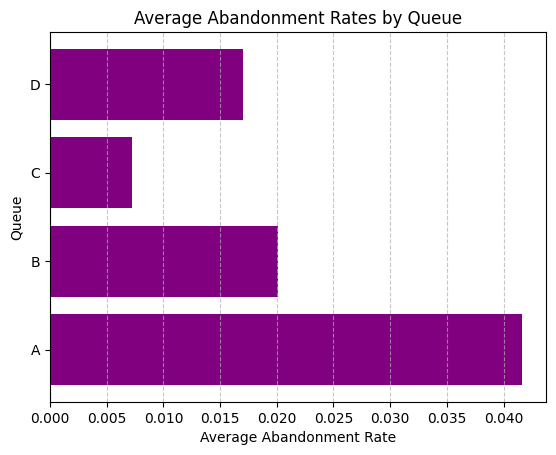

In [168]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = combined_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
labels = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.barh(labels, values, color='purple')
plt.title('Average Abandonment Rates by Queue')
plt.xlabel('Average Abandonment Rate')
plt.ylabel('Queue')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

##### Record your answer below:

> Chart style you chose and why: A horizontal bar chart shows the distinction in the rate differences well.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

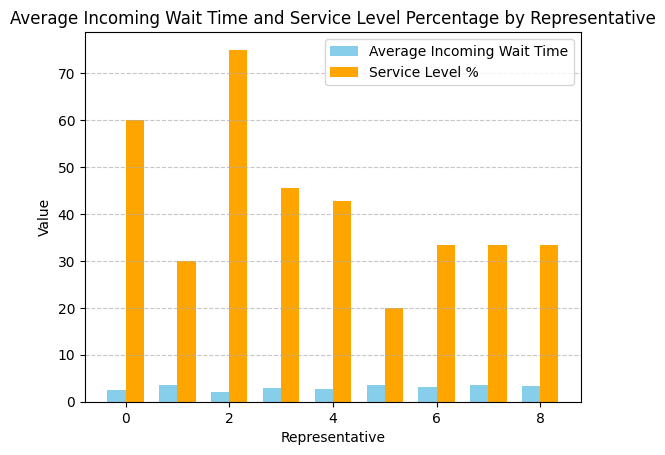

In [181]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage. Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level_percents = service_level["Service Level %"]

#Your Code Here:
labels = service_level_percents
incoming_wait_times = north_plt["Incoming Wait Time"]
service_levels = service_level["Service Level %"]
bar_width = 0.35
x = np.arange(len(labels)) 

bars1 = plt.bar(x - bar_width / 2, incoming_wait_times, bar_width, label='Average Incoming Wait Time', color='skyblue')
bars2 = plt.bar(x + bar_width / 2, service_levels, bar_width, label='Service Level %', color='orange')

plt.xlabel('Representative')
plt.title('Average Incoming Wait Time and Service Level Percentage by Representative')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



##### Record your answer below:

> Chart style you chose and why: A vertical bar chart is pleasing to the eye and easily shows and side by side for easy comparison. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

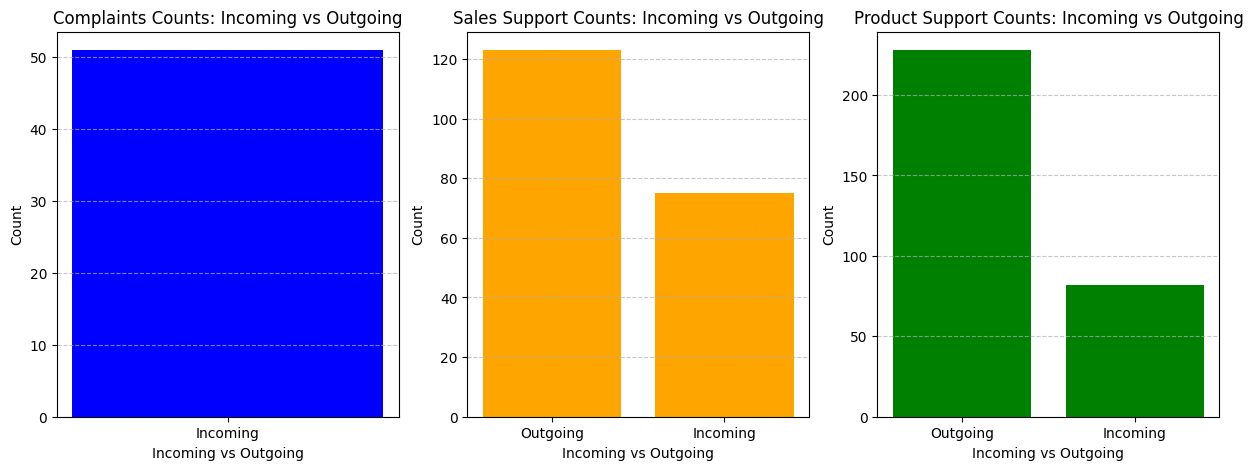

In [201]:
# # Create visualization 3 here:
# # The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group =combined_df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# #Your Code Here:
complaints = purpose_counts["Complaint"]
sales_support = purpose_counts["Sales Support"]
product_support = purpose_counts["Product Support"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(complaints.index, complaints.values, color='blue')
axs[0].set_title('Complaints Counts: Incoming vs Outgoing')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Incoming vs Outgoing')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

axs[1].bar(sales_support.index, sales_support.values, color='orange')
axs[1].set_title('Sales Support Counts: Incoming vs Outgoing')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Incoming vs Outgoing')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[2].bar(product_support.index, product_support.values, color='green')
axs[2].set_title('Product Support Counts: Incoming vs Outgoing')
axs[2].set_ylabel('Count')
axs[2].set_xlabel('Incoming vs Outgoing')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### Record your answer below:

> Chart style you chose and why: Visualizing the three vertical bar charts side by side is the easiest way to get a quick glimpse between the three categories. HHowever each chart is marked using a different scale so the view will need to make note of that.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The south branch is operating more effeciantly than the north branch based off the average abandonment rate, service level, and averge speed of answer. The south branch has a lower abdonded call rate, lower incoming wait time and answer more calls withing 2 seconds.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I believe the north branch would benefit from having the extra help as they currently have fewer works and are able to answer fewer calls. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I think the data provided was useful and gave adequate amount of information to determine which location could benefit from gaining extra help. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: